# Import Libraries and Load Dataset

In [ ]:
# Step 1: Import necessary libraries
import pandas as pd

# Step 2: Load the dataset
# Ensure to use the correct file path format
df = pd.read_csv("/content/train.csv")
print(f"Total rows in the dataset: {df.shape[0]}")
df.info()  # Display dataset structure and info

Total rows in the dataset: 94667
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94667 entries, 0 to 94666
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   building_id    94667 non-null  int64  
 1   meter          94666 non-null  float64
 2   timestamp      94666 non-null  object 
 3   meter_reading  94666 non-null  float64
dtypes: float64(2), int64(1), object(1)
memory usage: 2.9+ MB


# Filter Data for Meter ID = 0 (Electricity)

In [ ]:
# Step 3: Filter dataset for rows where 'meter' is 0 (electricity meter data)
electricity_df = df[df['meter'] == 0]

# Optional: Sort by timestamp if needed for time series analysis
electricity_df = electricity_df.sort_values(by='timestamp')
print(electricity_df.head())  # Display first few rows of filtered electricity data


      building_id  meter            timestamp  meter_reading
0               0    0.0  2016-01-01 00:00:00            0.0
1277          960    0.0  2016-01-01 00:00:00            0.0
1274          959    0.0  2016-01-01 00:00:00            0.0
1271          958    0.0  2016-01-01 00:00:00            0.0
1268          957    0.0  2016-01-01 00:00:00            0.0


# Save Filtered Electricity Data to CSV (Optional)


In [ ]:
# Step 4: Save filtered electricity data to a new CSV file (optional)
electricity_df.to_csv('filtered_electricity_data.csv', index=False)
print(f"Rows with electricity meter (meter=0): {electricity_df.shape[0]}")
electricity_df.info()


Rows with electricity meter (meter=0): 57206
<class 'pandas.core.frame.DataFrame'>
Index: 57206 entries, 0 to 94665
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   building_id    57206 non-null  int64  
 1   meter          57206 non-null  float64
 2   timestamp      57206 non-null  object 
 3   meter_reading  57206 non-null  float64
dtypes: float64(2), int64(1), object(1)
memory usage: 2.2+ MB


# Filter Data for Building ID 779

In [ ]:
# Step 5: Filter dataset for rows where 'building_id' is 779
building_779_df = df[df['building_id'] == 779]
print(building_779_df.head())  # Display first few rows of filtered data


       building_id  meter            timestamp  meter_reading
947            779    0.0  2016-01-01 00:00:00        73.0778
3246           779    0.0  2016-01-01 01:00:00        70.8972
5541           779    0.0  2016-01-01 02:00:00        70.6000
7839           779    0.0  2016-01-01 03:00:00        68.9139
10134          779    0.0  2016-01-01 04:00:00        68.0778


# Count Rows for Building ID 779 (Optional)

In [ ]:
# Step 6: Count and display rows for building ID 779 (optional)
print(f"Rows with building_id 779: {building_779_df.shape[0]}")
building_779_df.info()


Rows with building_id 779: 41
<class 'pandas.core.frame.DataFrame'>
Index: 41 entries, 947 to 92830
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   building_id    41 non-null     int64  
 1   meter          41 non-null     float64
 2   timestamp      41 non-null     object 
 3   meter_reading  41 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 1.6+ KB


# Save Filtered Building 779 Data to CSV (Optional)

In [ ]:
# Step 7: Save filtered building 779 data to a new CSV file (optional)
building_779_df.to_csv('filtered_electricity779_data.csv', index=False)


# Convert Meter Readings to kWh and Save Updated Data


In [ ]:
# Step 8: Convert 'meter_reading' values to kWh by multiplying by 0.2931
building_779_df['meter_reading'] *= 0.2931
print(building_779_df.head())  # Display updated data with converted meter readings

# Step 9: Save the updated data to a new CSV file (optional)
building_779_df.to_csv('building_779_updated_meter_reading.csv', index=False)
building_779_df.info()


       building_id  meter            timestamp  meter_reading
947            779    0.0  2016-01-01 00:00:00      21.419103
3246           779    0.0  2016-01-01 01:00:00      20.779969
5541           779    0.0  2016-01-01 02:00:00      20.692860
7839           779    0.0  2016-01-01 03:00:00      20.198664
10134          779    0.0  2016-01-01 04:00:00      19.953603
<class 'pandas.core.frame.DataFrame'>
Index: 41 entries, 947 to 92830
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   building_id    41 non-null     int64  
 1   meter          41 non-null     float64
 2   timestamp      41 non-null     object 
 3   meter_reading  41 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 1.6+ KB


<ipython-input-7-231da67b8fad>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  building_779_df['meter_reading'] *= 0.2931


# Generate and Style Feature Distribution Table

In [9]:
# Step 10: Generate a feature distribution table for building 779 data
df_updated = pd.read_csv("/content/building_779_updated_meter_reading.csv")
feature_distribution = building_779_df.describe().transpose()

# Apply color gradients to the distribution table using pandas Styler (for visualization)
styled_table = feature_distribution.style.background_gradient(cmap='viridis', axis=1)
styled_table  # Display the styled table


,count,mean,std,min,25%,50%,75%,max
building_id,41.000000,779.000000,0.000000,779.000000,779.000000,779.000000,779.000000,779.000000
meter,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
meter_reading,41.000000,22.418320,2.677476,18.633012,20.212498,21.695086,24.631802,29.031584


# Visualize Distributions of Numerical Columns

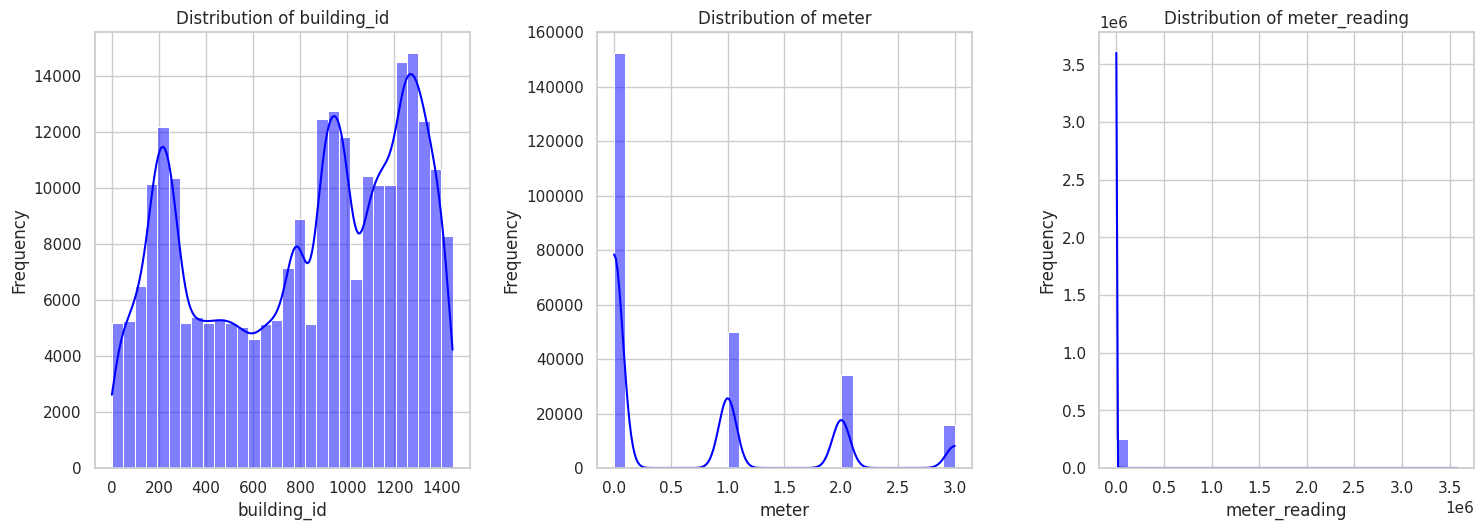

In [11]:
# Step 11: Visualize distribution of numerical columns in the dataset
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("/content/train.csv")

# Generate the feature distribution table
feature_distribution = df.describe().transpose()

# List of numerical columns to plot distribution for
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Set seaborn style
sns.set(style="whitegrid")
plt.figure(figsize=(15, 10))  # Define figure size

# Loop through each numerical feature and plot its distribution
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns) // 3 + 1, 3, i)
    sns.histplot(df[col], kde=True, color='blue', bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()
